# COVID-19 Detection Using CNN

In [24]:
#pip install tensorflow

In [25]:
#pip install keras

#### Dataset

https://www.kaggle.com/khoongweihao/covid19-xray-dataset-train-test-sets

### Importing the libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

## Data Preprocessing

In [27]:
dim = (224, 224, 3)
target_size = dim[:2]
batch_size = 32
epochs = 10

### Generating images for the Training set

In [28]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

### Generating images for the Test set

In [29]:
test_datagen = ImageDataGenerator(rescale = 1./255)

### Creating the Training set

In [30]:
training_set = train_datagen.flow_from_directory('xray_dataset_covid19/train',
                                                 target_size = target_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

Found 148 images belonging to 2 classes.


### Creating the Test set

In [31]:
test_set = test_datagen.flow_from_directory('xray_dataset_covid19/test',
                                            target_size = target_size,
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 40 images belonging to 2 classes.


### Data Exploration

In [32]:
# Data labels
classes = training_set.class_indices

In [33]:
# Displaying basic data

print('Image Size (Pixels):', target_size)
print('Color Mode:', training_set.color_mode)
print('Training set:', training_set.n, 'images')
print('Test set:', test_set.n, 'images')
print('Classes:', classes)

Image Size (Pixels): (224, 224)
Color Mode: rgb
Training set: 148 images
Test set: 40 images
Classes: {'NORMAL': 0, 'PNEUMONIA': 1}


In [34]:
encoding = {v: k[:-1] for k, v in classes.items()}
encoding

{0: 'NORMA', 1: 'PNEUMONI'}

### Data Visualization

In [35]:
# Loading some images
images, labels = test_set.next()

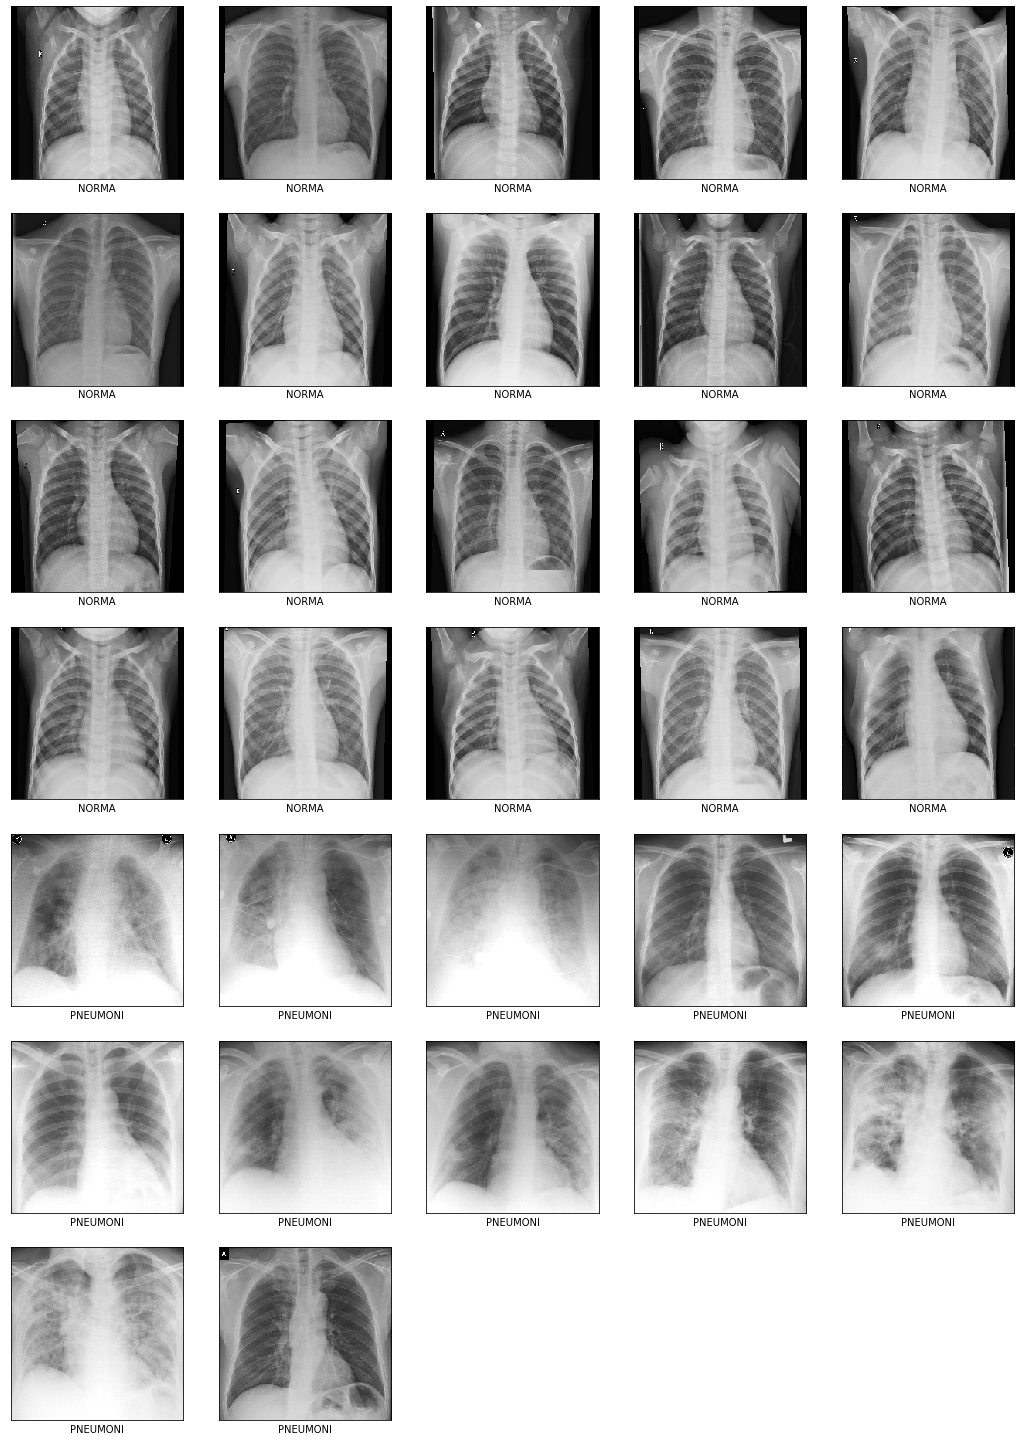

In [36]:
plt.figure(figsize=(18, 26))
for i in range(32):
    plt.subplot(7, 5, i+1)
    plt.xticks([])
    plt.yticks([])

    lbl = int(labels[i])
    plt.xlabel(encoding[lbl])
    plt.imshow(images[i])

plt.show()

## Building the CNN

### Initialising the CNN

In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [38]:
cnn = Sequential()

### Convolution and Pooling (first convolutional layer)

In [39]:
cnn.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=dim))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding a second convolutional layer

In [40]:
cnn.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Flattening

In [41]:
cnn.add(Flatten())

### Full Connection

In [42]:
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=64, activation='relu'))

### Output Layer

In [43]:
cnn.add(Dense(units=1, activation='sigmoid'))

## Training the CNN

### Compiling the CNN

In [44]:
cnn.compile(optimizer = 'adam', 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy'])

In [45]:
# Neural Network summary

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               12845184  
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

### Training the CNN on the Training set and evaluating it on the Test set

In [46]:
history = cnn.fit(training_set,
                  validation_data = test_set,
                  epochs = epochs)

Epoch 1/10
5/5 [==============================] - 8s 2s/step - loss: 2.8636 - accuracy: 0.5000 - val_loss: 0.7870 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 8s 2s/step - loss: 0.7274 - accuracy: 0.6014 - val_loss: 0.3765 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 0.4903 - accuracy: 0.8176 - val_loss: 0.2886 - val_accuracy: 0.9750
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 0.4895 - accuracy: 0.7432 - val_loss: 0.2089 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 9s 2s/step - loss: 0.4063 - accuracy: 0.8243 - val_loss: 0.1395 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 7s 1s/step - loss: 0.3446 - accuracy: 0.8716 - val_loss: 0.1229 - val_accuracy: 0.9500
Epoch 7/10
5/5 [==============================] - 8s 2s/step - loss: 0.3910 - accuracy: 0.8176 - val_loss: 0.0896 - val_accuracy: 1.0000
Epoch 8/10
5/5 [=========================

In [47]:
cnn.weights

[<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[ 0.03064512,  0.06278325, -0.0225644 , -0.06960789,
            0.03394363, -0.1325564 ,  0.12608066, -0.12741813,
           -0.00207148, -0.11362854, -0.12485527,  0.02343901,
            0.07814963, -0.05462356,  0.10027844,  0.05233157,
           -0.05217889, -0.06854824, -0.04026125,  0.05678092,
           -0.04369681,  0.0752395 ,  0.0014559 ,  0.08064321,
            0.12016331, -0.01232736,  0.05697957,  0.01067606,
           -0.00055411,  0.0705891 ,  0.05940097,  0.03104856],
          [-0.01729401,  0.09766719, -0.11409687,  0.10047708,
            0.01171631,  0.09841482,  0.03520896,  0.04984235,
            0.01529128,  0.05416442, -0.02016626, -0.06225904,
           -0.06679016, -0.10044125,  0.07318037, -0.00865452,
           -0.00268266,  0.13025577, -0.13638054, -0.02259515,
            0.06414227,  0.11578956,  0.08617636,  0.06564546,
           -0.0598325 ,  0.0664725 , -0.0

### Model Evaluation

In [48]:
def report(y_test, y_pred):
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
    import seaborn as sns

    cm = confusion_matrix(y_test, y_pred)
    print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
    print('Precision:', precision_score(y_test, y_pred), sep='\t')
    print('Recall:', recall_score(y_test, y_pred), sep='\t\t')
    print('F1:', f1_score(y_test, y_pred), sep='\t\t')
    print('\n')

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt = 'd', annot_kws={"size": 35}).set_title('Confusion Matrix')
    plt.show()

In [49]:
cnn.evaluate(test_set)

2/2 [==============================] - 0s 39ms/step - loss: 0.0680 - accuracy: 1.0000


[0.06800548732280731, 1.0]

In [50]:
# Predicting the Test set results

y_pred = cnn.predict(test_set, verbose=1) 
y_pred = y_pred > 0.5

2/2 [==============================] - 0s 33ms/step


Accuracy:	1.0
Precision:	1.0
Recall:		1.0
F1:		1.0




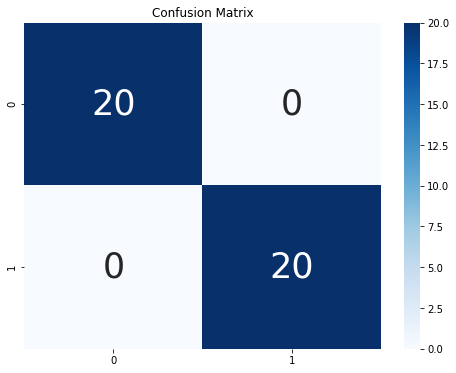

In [51]:
report(test_set.classes, y_pred)

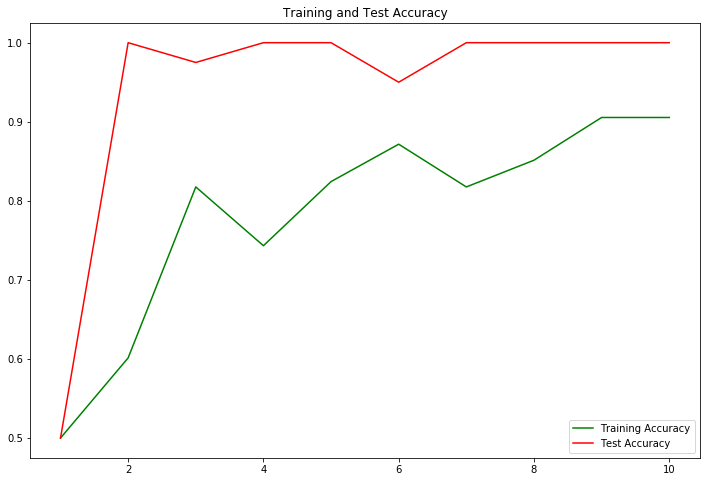

In [52]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, epochs+1), 
         accuracy, 
         color = 'green',
         label = "Training Accuracy")
plt.plot(np.arange(1, epochs+1), 
         val_accuracy, 
         color = 'red',
         label = "Test Accuracy")
plt.legend()
plt.title("Training and Test Accuracy")
plt.show()

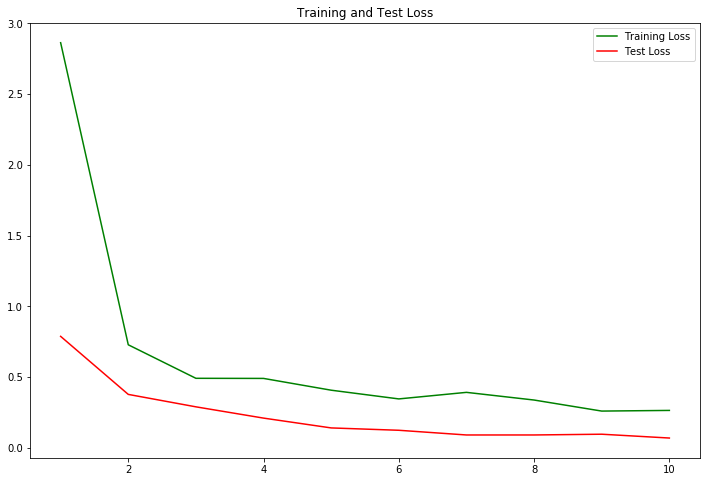

In [53]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, epochs+1), 
         loss, 
         color = 'green',
         label = "Training Loss")
plt.plot(np.arange(1, epochs+1), 
         val_loss, 
         color = 'red',
         label = "Test Loss")
plt.legend()
plt.title("Training and Test Loss")
plt.show()

### More Testing

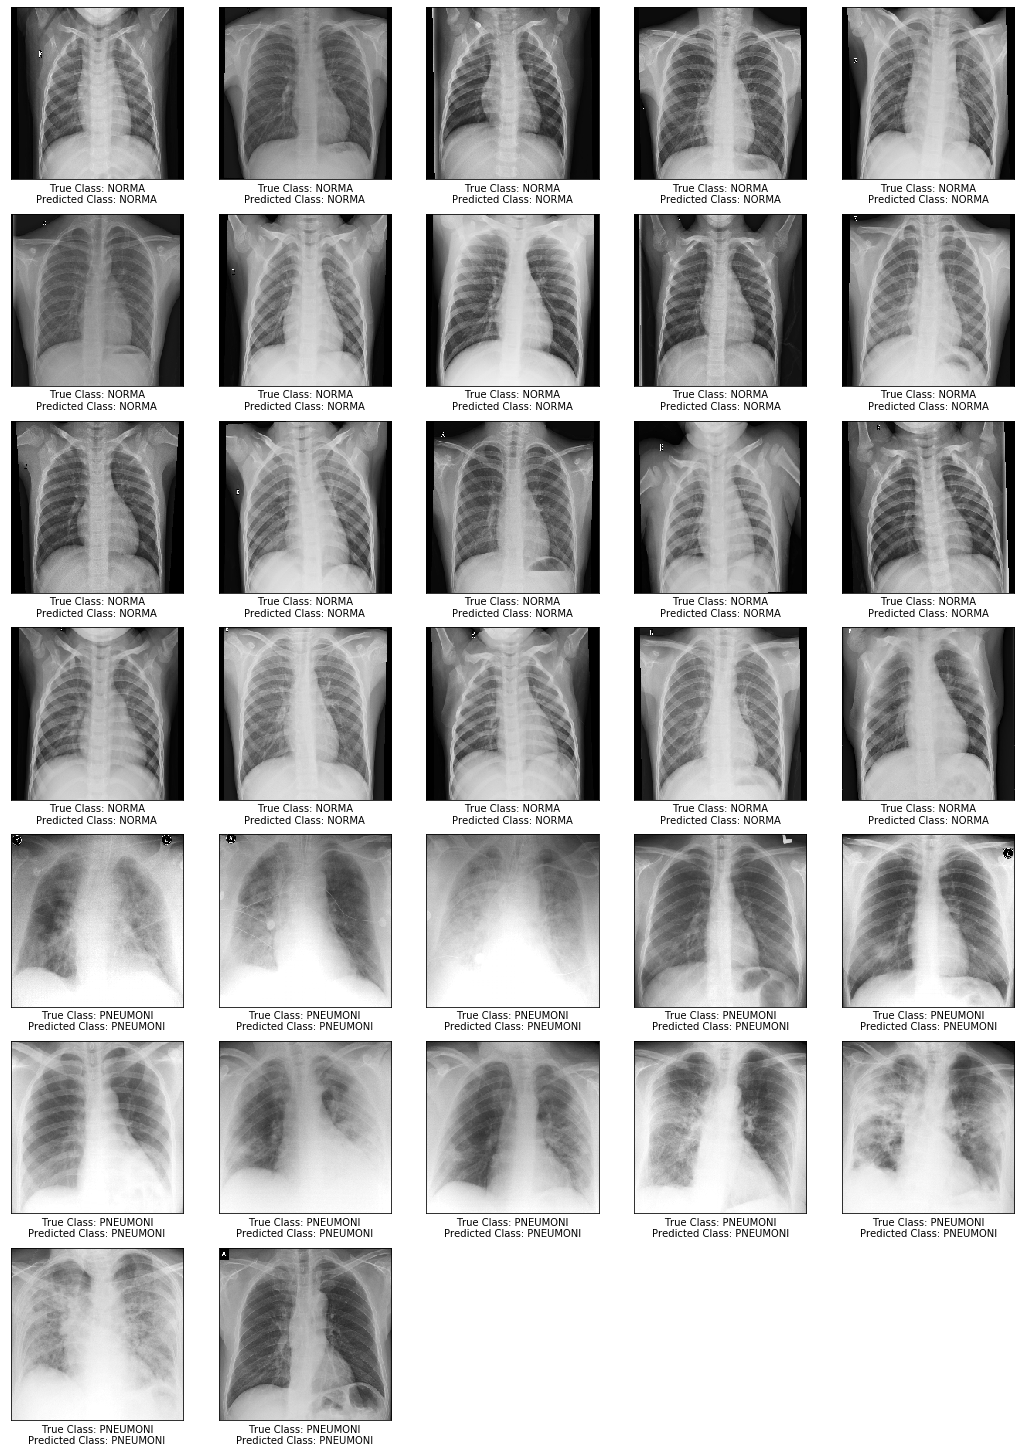

In [54]:
y_sample = cnn.predict(images) > 0.5

plt.figure(figsize=(18, 26))
for i in range(32):
    plt.subplot(7, 5, i+1)
    plt.xticks([])
    plt.yticks([])

    lbl = int(labels[i])
    lbl_pred = int(y_sample[i])
    plt.xlabel('True Class: ' + str(encoding[lbl]) + '\nPredicted Class: ' + str(encoding[lbl_pred]))
    plt.imshow(images[i])

plt.show()

Accuracy:	1.0
Precision:	1.0
Recall:		1.0
F1:		1.0




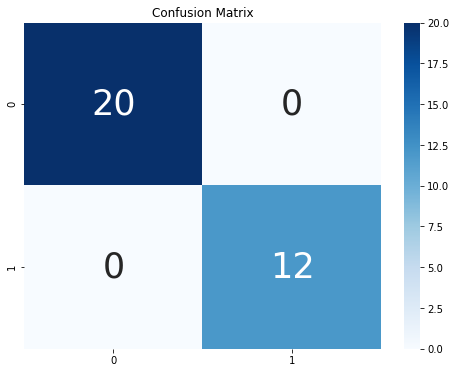

In [55]:
report(labels, y_sample)

In [56]:
cnn.save('model.h5')